In [198]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

In [199]:
# Lade das Datenset
# Tausche hier die Daten aus
partei_datensatz = pd.read_csv("fpoe.csv")
partei_name = "FPÖ"
Angelobung_Datum = "2017-12-18"


# Teste ob die Daten funktionieren
datensatz_kurz = partei_datensatz[1000:1005]
#print(datensatz_kurz["Inhalt"][1])

In [200]:
angelobung = pd.to_datetime(Angelobung_Datum)
print(angelobung)

2017-12-18 00:00:00


In [201]:
# Installiere wenn du ihn noch nicht hast, den Sentiment analyser
#pip install germansentiment

In [202]:
from germansentiment import SentimentModel


In [203]:
model = SentimentModel()

In [204]:
# Definiere die Funktion zur Berechnung des Scores

def sentiment_calculator(text):
    classes, probabilities = model.predict_sentiment([text], output_probabilities = True)
    # Berechnet einen Wert zwischen 1 und 3, wobei 3 sehr positiv ist und 1 sehr negativ.
    # Da uns das deutsche Sentiment Package nur die WSK gibt, habe ich daraus einen score kalkuliert.
    # 3 ist nur positiv, 2 ist komplett neutral, 1 ist komplett negativ
    score_zw_1_und_3 = (probabilities[0][0][1])*3+(probabilities[0][1][1])*1+(probabilities[0][2][1])*2
    # positive_wsk*3 + neutrale_wsk*2 + negative_wsk)*1
    return score_zw_1_und_3

In [205]:
# Speichert den Score in einer neuen Zeile
datensatz_kurz
#partei_datensatz["Sentiment Score"]=partei_datensatz["Inhalt"].apply(sentiment_calculator)
partei_datensatz["Sentiment Score"]=partei_datensatz["Inhalt"].apply(sentiment_calculator)


print(partei_datensatz[["Titel","Sentiment Score","Datum"]])

                                                  Titel  Sentiment Score  \
0     FPÖ-Obermayr: Visa-Notbremse statt fragwürdige...         1.940279   
1     Vilimsky: FPÖ kooperiert bestens mit EU-Partne...         1.976483   
2                                  FPÖ-Spitze in Moskau         1.998481   
3     FPÖ-Schrangl: Sozialdemokratie wohnpolitisch i...         1.953548   
4     FPÖ: Aviso: Morgen Pressekonferenz Strache, Gu...         1.999912   
...                                                 ...              ...   
1917  FPÖ-Schrangl an Becher: "Rote Weihnachtsgesche...         1.810035   
1918  Dinghofer-Institut verleiht Medienpreis an „Zu...         1.999681   
1919         FPÖ-Gudenus: „In der SPÖ gärt es gewaltig“         1.855125   
1920  Rapid-Fans: AUF/FPÖ-Herbert: „Polizei hat rech...         1.566885   
1921  FPÖ-Wurm: „Modernisierung des VKI wurde heute ...         1.999090   

                    Datum  
0     2016-12-18 12:03:17  
1     2016-12-19 09:00:01  
2  

In [206]:
# Schaut, ob der Tag vor oder nach der Angelobung liegt

def datums_checker(veröffentlichungs_datum):
    kurzes_datum =pd.to_datetime(veröffentlichungs_datum[:10])
    if kurzes_datum > angelobung:
        return 1
    else:
        return 0
    

partei_datensatz["Nach Angelobung"]=partei_datensatz["Datum"].apply(datums_checker)

print(partei_datensatz)

                    Datum                                              Titel  \
0     2016-12-18 12:03:17  FPÖ-Obermayr: Visa-Notbremse statt fragwürdige...   
1     2016-12-19 09:00:01  Vilimsky: FPÖ kooperiert bestens mit EU-Partne...   
2     2016-12-19 10:55:49                               FPÖ-Spitze in Moskau   
3     2016-12-19 12:11:56  FPÖ-Schrangl: Sozialdemokratie wohnpolitisch i...   
4     2016-12-19 13:37:35  FPÖ: Aviso: Morgen Pressekonferenz Strache, Gu...   
...                   ...                                                ...   
1917  2018-12-17 12:50:26  FPÖ-Schrangl an Becher: "Rote Weihnachtsgesche...   
1918  2018-12-18 08:39:12  Dinghofer-Institut verleiht Medienpreis an „Zu...   
1919  2018-12-18 09:25:14         FPÖ-Gudenus: „In der SPÖ gärt es gewaltig“   
1920  2018-12-18 09:43:33  Rapid-Fans: AUF/FPÖ-Herbert: „Polizei hat rech...   
1921  2018-12-18 12:14:32  FPÖ-Wurm: „Modernisierung des VKI wurde heute ...   

                                       

In [207]:
partei_datensatz["Sentiment Score"]


0       1.940279
1       1.976483
2       1.998481
3       1.953548
4       1.999912
          ...   
1917    1.810035
1918    1.999681
1919    1.855125
1920    1.566885
1921    1.999090
Name: Sentiment Score, Length: 1922, dtype: float64

In [208]:
# Berechne den Durchschnitt vor der Angelobung
vor_angelobung_avg = partei_datensatz[partei_datensatz["Nach Angelobung"] == 0]["Sentiment Score"].mean()
print(vor_angelobung_avg)

vor_angelobung_std = partei_datensatz[partei_datensatz["Nach Angelobung"] == 0]["Sentiment Score"].std()
print(vor_angelobung_std)

vor_angelobung_len = len(partei_datensatz[partei_datensatz["Nach Angelobung"] == 0])
print(vor_angelobung_len)


# Berechne den Durschnitt nach der Angelobung
nach_angelobung_avg = partei_datensatz[partei_datensatz["Nach Angelobung"] == 1]["Sentiment Score"].mean()
print(nach_angelobung_avg)

nach_angelobung_std = partei_datensatz[partei_datensatz["Nach Angelobung"] == 1]["Sentiment Score"].std()
print(nach_angelobung_std)

nach_angelobung_len = len(partei_datensatz[partei_datensatz["Nach Angelobung"] == 1])
print(nach_angelobung_len)

print(f"{partei_name} Durchschnitt vor der Angelobung: {vor_angelobung}")
print(f"{partei_name} Durchschnitt nach der Angelobung: {nach_angelobung}")

1.8530757307804897
0.2889129400116209
1022
1.7956942950495451
0.3414016080729182
900
FPÖ Durchschnitt vor der Angelobung: 1.8530757307804897
FPÖ Durchschnitt nach der Angelobung: 1.7907468023847586


In [209]:
# Berechne den t-test
group1 = np.random.normal(vor_angelobung_avg, vor_angelobung_std, vor_angelobung_len)
group2 = np.random.normal(nach_angelobung_avg, nach_angelobung_std, nach_angelobung_len)

# t-Test durchführen
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test (ungleiche Varianzen)
print(f"T-Wert: {t_stat:.3f}, p-Wert: {p_value:.3f}")

T-Wert: 4.246, p-Wert: 0.000


In [210]:
partei_datensatz
# Sortiere die Daten nach Monat
def datums_kürzer(veröffentlichungs_datum):
    jahr_monat = veröffentlichungs_datum[:7]
    return jahr_monat
    

partei_datensatz["Jahr_Monat"]=partei_datensatz["Datum"].apply(datums_kürzer)

print(partei_datensatz)

                    Datum                                              Titel  \
0     2016-12-18 12:03:17  FPÖ-Obermayr: Visa-Notbremse statt fragwürdige...   
1     2016-12-19 09:00:01  Vilimsky: FPÖ kooperiert bestens mit EU-Partne...   
2     2016-12-19 10:55:49                               FPÖ-Spitze in Moskau   
3     2016-12-19 12:11:56  FPÖ-Schrangl: Sozialdemokratie wohnpolitisch i...   
4     2016-12-19 13:37:35  FPÖ: Aviso: Morgen Pressekonferenz Strache, Gu...   
...                   ...                                                ...   
1917  2018-12-17 12:50:26  FPÖ-Schrangl an Becher: "Rote Weihnachtsgesche...   
1918  2018-12-18 08:39:12  Dinghofer-Institut verleiht Medienpreis an „Zu...   
1919  2018-12-18 09:25:14         FPÖ-Gudenus: „In der SPÖ gärt es gewaltig“   
1920  2018-12-18 09:43:33  Rapid-Fans: AUF/FPÖ-Herbert: „Polizei hat rech...   
1921  2018-12-18 12:14:32  FPÖ-Wurm: „Modernisierung des VKI wurde heute ...   

                                       

In [211]:
durchschnitt_pro_monat = partei_datensatz.groupby('Jahr_Monat')['Sentiment Score'].mean()
print(durchschnitt_pro_monat)
monatswert = pd.DataFrame(durchschnitt_pro_monat)
x = monatswert.index.to_list()
y = monatswert["Sentiment Score"].to_list()
print(y)

Jahr_Monat
2016-12    1.925621
2017-01    1.853867
2017-02    1.893510
2017-03    1.854954
2017-04    1.869786
2017-05    1.824571
2017-06    1.850476
2017-07    1.801873
2017-08    1.856716
2017-09    1.867409
2017-10    1.800621
2017-11    1.922464
2017-12    1.835659
2018-01    1.791905
2018-02    1.833248
2018-03    1.755239
2018-04    1.809355
2018-05    1.849709
2018-06    1.762502
2018-07    1.781009
2018-08    1.797313
2018-09    1.773125
2018-10    1.824992
2018-11    1.775596
2018-12    1.802144
Name: Sentiment Score, dtype: float64
[1.9256211523764553, 1.8538665224609534, 1.8935095243404527, 1.854953737652888, 1.869786434134876, 1.8245705961539744, 1.850475933771122, 1.8018734598668757, 1.8567156762594026, 1.8674087987144796, 1.8006212689029009, 1.9224635224849966, 1.8356590112107802, 1.7919053666113638, 1.8332479823887244, 1.7552386314418538, 1.8093551234757677, 1.8497092218151967, 1.7625017294158731, 1.7810092434578109, 1.7973132839508605, 1.7731248180538557, 1.82499242923

In [212]:
# Speichert in neuem Datensatz
partei_datensatz.to_csv("mit_sentiment_score")
monatswert.to_csv("liniendiagramm")

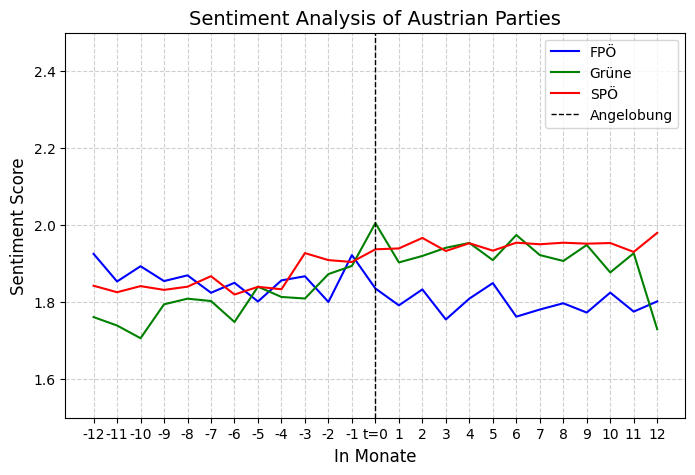

In [221]:
plt.figure(figsize=(8, 5))
x = [-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, "t=0", 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
grüne = [1.7613615997189689, 1.739512840868402, 1.7064914696190498, 1.794565508916331, 1.8092225745948174, 1.8031006872743487, 1.7486766778256424, 1.8403483075616633, 1.8136485285880604, 1.8096156500432699, 1.873107736164931, 1.8942900234945357, 2.005437563912231, 1.9033295070780696, 1.9201905222941302, 1.9413752075627713, 1.9540096327046732, 1.909350608521641, 1.9745941951836725, 1.9225376978297504, 1.9071575682463278, 1.948693310482567, 1.8773795924962542, 1.92724829998263, 1.7297788094341133]
SPÖ= [1.8428412943386814, 1.825976687879546, 1.8418178169752384, 1.8320441188925192, 1.840364557352042, 1.8676209238583361, 1.8200046939214134, 1.8399489766925472, 1.8337011825717318, 1.927562161898425, 1.909376020683317, 1.9045318466043304, 1.9374284334909715, 1.9397487268893665, 1.9670231239558673, 1.9330562195648866, 1.9532165839021771, 1.9339636088564685, 1.9546080779687762, 1.9505616680658147, 1.9545669522172646, 1.952093231557536, 1.9537355518396529, 1.9306455222051317, 1.9802211072958642]

plt.plot(x, y, linestyle='-', color='b', label='FPÖ')
plt.plot(x, grüne, linestyle='-', color='g', label='Grüne' )
plt.plot(x, SPÖ, linestyle='-', color='r', label='SPÖ' )

plt.ylim(1.5, 2.5)


# Diagrammbeschriftungen und Titel
plt.title('Sentiment Analysis of Austrian Parties', fontsize=14)
plt.xlabel('In Monate', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.axvline(x="t=0", color='black', linestyle='--', linewidth=1, label="Angelobung")


# Gitter und Legende hinzufügen
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Diagramm anzeigen
plt.show()